In [1]:
!pip install kornia
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow as imshow
from google.colab import drive
import kornia
import torch

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\http\client.py", line 459, in read
    n = self.readinto(b)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\http\client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\users\hp\appdata\local\programs\python\python39\li

ModuleNotFoundError: No module named 'google.colab'

In [2]:
#loading data from my drive
drive.mount('/content/drive')
allImages= [] # array to hold all images
Mask = [] # array to hold mask images
noMask = [] # array to hold non maks images

#2 for loops to read the files from the dataset uploaded on my drive
for filename in os.listdir('/content/drive/MyDrive/Image/withMask'):
  Mask.append(cv.imread(f'/content/drive/MyDrive/Image/withMask/{filename}'))
  allImages.append(cv.imread(f'/content/drive/MyDrive/Image/withMask/{filename}'))
Mask=np.array(Mask) # making numpy array of the masks for easier handling later

for filename in os.listdir('/content/drive/MyDrive/Image/noMask'):
  noMask.append(cv.imread(f'/content/drive/MyDrive/Image/noMask/{filename}'))
  allImages.append(cv.imread(f'/content/drive/MyDrive/Image/noMask/{filename}'))
noMask=np.array(noMask) # making numpy array of the masks for easier handling later
all_images = np.array(allImages) # making numpy array of the masks for easier handling later

Mounted at /content/drive


<ipython-input-2-677bb351a6a4>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Mask=np.array(Mask) # making numpy array of the masks for easier handling later
<ipython-input-2-677bb351a6a4>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noMask=np.array(noMask) # making numpy array of the masks for easier handling later
<ipython-input-2-677bb351a6a4>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

In [3]:
#function used to get gray image, helpful in most of the features used since most of them requires grayscale image
def toGrayScale(img):
  img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  return img

In [27]:
from zmq.constants import NULL
#Function to get the mean for blue channel of image
def mean_blue(img):
  return np.mean(img[:,:,2].flatten()) 

#Function to get the mean for green channel of image
def mean_green(img):
  return np.mean(img[:,:,1].flatten())

#Function to get the Vertical edges in the image
def vertical_edges(img): 
  img=toGrayScale(img)
  vertical = np.array([[5, 0, -5],
                    [5, 0, -5],
                    [5 ,0, -5]])
  return np.mean(cv.filter2D(src=img, ddepth=-1, kernel=vertical))

#Function to get the Horizontal edges in the image
def horizontal_edges(img):
  img=toGrayScale(img)
  horizontal = np.array([[5, 5, 5],
                    [0, 0, 0],
                    [-5, -5, -5]])
  return np.mean(cv.filter2D(src=img, ddepth=-1, kernel=horizontal).flatten())
  
#Function to get the orb Keypoints of image
def orb(img):
  img=toGrayScale(img)
  orb = cv.ORB_create()
  keypoints=orb.detect(img,None)
  img=cv.drawKeypoints(img,keypoints,img)
  return np.mean(img.flatten())
# Using harriscorner detection method here to get the hilated corners
def harrisCorner(img):
  gray=toGrayScale(img)
  dst=cv.cornerHarris(gray,2,3,0.04)
  dst=cv.dilate(dst,None)
  return np.mean(dst.flatten())
  
#Function to get CannyImage that is used to detect edges
def cannyImage(img):
  img=toGrayScale(img)
  img = cv.Canny(img,100,150)
  return np.mean(img.flatten())

#Funtion to get the Contour of image to help get the boundary of the face
def controurImage(img):
  img=toGrayScale(img)
  ret,thresh=cv.threshold(img,150,255,cv.THRESH_BINARY) 
  return np.mean(thresh.flatten())


In [28]:
# Function used to extract all the features per images, helpful in testing later
def getFeatures(img): 
    image=img
    i1=mean_blue(image)
    i2=mean_green(image)
    i7=controurImage(image)
    i8=harrisCorner(image)
    i3=vertical_edges(image)
    i4=horizontal_edges(image)
    i5=orb(image)
    i6=cannyImage(image)
    features =np.concatenate((i1,i2,i3,i4,i5,i6,i7,i8),axis=None)
    return features

In [29]:
# some arrays to hold different number of features. and labels
Mask_Numpy = []
noMask_Numpy = []
noMask_done_8 = []
noMask_done_F8 = []
noMask_done_F4 = []
noMask_done_F2 = []
Mask_done_F8 = []
Mask_done_F4 = []
Mask_done_F2 = []
Labels = []
for i in range(len(Mask)):
  Mask_Numpy.append(getFeatures(Mask[i]))
  Labels.append("Mask")
for i in range(len(noMask)):
  noMask_Numpy.append(getFeatures(noMask[i]))
  Labels.append("noMask")
Mask_Numpy = np.array(Mask_Numpy)
noMask_Numpy = np.array(noMask_Numpy)
for i in range(len(Mask_Numpy)):
  Mask_done_F8.append(Mask_Numpy[i][:8])
  Mask_done_F4.append(Mask_Numpy[i][:4])
  Mask_done_F2.append(Mask_Numpy[i][:2])
for i in range(len(noMask_Numpy)):
  noMask_done_F8.append(noMask_Numpy[i][:8])
  noMask_done_F4.append(noMask_Numpy[i][:4])
  noMask_done_F2.append(noMask_Numpy[i][:2])
Features_8=np.concatenate((Mask_done_F8,noMask_done_F8))
Features_4=np.concatenate((Mask_done_F4,noMask_done_F4))
Features_2=np.concatenate((Mask_done_F2,noMask_done_F2))

In [30]:
#Classification models, Using RandomForest, Gaussian, Decision Trees, and GradientBoosting, and finally using Support Vectore Machine Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
train_8x, test_8x, train_8y, test_8y= train_test_split(
        Features_8, Labels, test_size=0.33)
train_4x, test_4x, train_4y, test_4y= train_test_split(
        Features_4, Labels, test_size=0.33)

train_2x, test_2x, train_2y, test_2y= train_test_split(
        Features_2, Labels, test_size=0.33,random_state=20)

#RandomForest Model
clf8 = RandomForestClassifier(n_estimators=250)
clf8.fit(train_8x, train_8y)
F8_Predict = clf8.predict(test_8x)
print(f"Accuracy using 8 featuers with RandomForest: {accuracy_score(test_8y, F8_Predict):%}")

clf4 = RandomForestClassifier(n_estimators=250)
clf4.fit(train_4x, train_4y)
F4_Predict = clf4.predict(test_4x)
print(f"Accuracy using 4 featuers with RandomForest: {accuracy_score(test_4y, F4_Predict):%}")

clf2 = RandomForestClassifier(n_estimators=250)
clf2.fit(train_2x, train_2y)
F2_Predict = clf2.predict(test_2x)
print(f"Accuracy using 2 featuers with RandomForest: {accuracy_score(test_2y, F2_Predict):%}")

#Gaussian Model
gnb = GaussianNB()
model = gnb.fit(train_8x, train_8y)
predictive_labels = gnb.predict(test_8x)
print(f"Accuracy using 8 features with Gaussian: {accuracy_score(test_8y, predictive_labels):%}")

#Decision trees Model
tree_clf = tree.DecisionTreeClassifier()
tree_clf= tree_clf.fit(train_8x,train_8y)
predictive_labels=tree_clf.predict(test_8x)
print(f"Accuracy using 8 features with Decision Trees: {accuracy_score(test_8y, predictive_labels):%}")

#GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(random_state=35)
clf_GB.fit(train_8x,train_8y)
predictive_labels=clf_GB.predict(test_8x)
print(f"Accuracy using 8 features with GradientBoosting: {accuracy_score(test_8y, predictive_labels):%}")

#Support Vector Machine
clf_SVM = svm.SVC(kernel='linear')
clf_SVM.fit(train_8x, train_8y)
predictive_labels = clf_SVM.predict(test_8x)
print(f"Accuracy using 8 features with Support Vector Machine: {accuracy_score(test_8y, predictive_labels):%}")

Accuracy using 8 featuers with RandomForest: 88.488435%
Accuracy using 4 featuers with RandomForest: 85.691232%
Accuracy using 2 featuers with RandomForest: 78.778913%
Accuracy using 8 features with Gaussian: 79.263045%
Accuracy using 8 features with Decision Trees: 83.270576%
Accuracy using 8 features with GradientBoosting: 87.681549%
Accuracy using 8 features with Support Vector Machine: 84.884346%


Random 8: ['Mask'], Random 4: ['Mask'], Random 2: ['Mask'], Gaussian 8: ['Mask'], Decision Trees 8: ['Mask'], GradientBoosting 8: ['Mask']
 SupportVectorMachine 8: ['Mask']


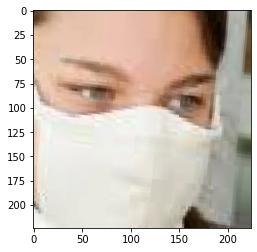

In [39]:
#run to predict a random image from the dataset
import random 
randomInt=random.randint(4000,7264) # even number of images from both classes
image = all_images[randomInt] # taking random picture
image_features = getFeatures(image) # getting the features from
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB)) # plotting the image
#Using randomForest 8 features & 4 features & 2 features
pred_RF8 = clf8.predict([image_features[:8]])
pred_RF4 = clf4.predict([image_features[:4]])
pred_RF2 = clf2.predict([image_features[:2]])
#Using GNB
pred_GNB = gnb.predict([image_features[:8]])
#Using Decision Trees
pred_TREE = tree_clf.predict([image_features[:8]])
#Using GB
pred_GB = clf_GB.predict([image_features[:8]])
#Using SVM
pred_SVM = clf_SVM.predict([image_features[:8]])
print(f"Random 8: {pred_RF8}, Random 4: {pred_RF4}, Random 2: {pred_RF2}, Gaussian 8: {pred_GNB}, Decision Trees 8: {pred_TREE}, GradientBoosting 8: {pred_GB}\n SupportVectorMachine 8: {pred_SVM}")